## `Report`


### `Landmark Selection`

**<u>Alexanderplatz and Berlin City Hall</u>**

    
    Alexanderplatz is a tower that is visible from anywhere in Berlin. I think this is a fact that makes Alexanderplatz representative enough of Berlin. Berlin City Hall is closely located from Alexanderplatz and it's the center of all administrative forces of the city of Berlin.

    I choose two LBA locations because this report includes:

    1. For the same location, I use two devices(iPhone 12 Pro Max and Coolpad 3701A) to take photos.
    2. I will see different result of training based on the image quality as iPhone 12 Pro Max has much better image quality than Coolpad which was relased in 2012.
    3. I repate the same thing at the different location to see if the result is consistent.

### Alexanderplatz with Coolpad 3701A

In [5]:
# Import all necessary moduels and libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
    
# Set a path for images
CoolpadAimage = glob('CoolpadA/*')

CoolpadAFlattened = []

for path in CoolpadAimage:
    # open files
    with open(path, 'r+b') as f:
        # open image
        with Image.open(f) as image:
            # Set it grayscale to make the ML simpler
            # and also to avoid any conflicts from color
            image = image.convert('L')
            # resize image to 512*512 pixels
            cover = resizeimage.resize_cover(image, [512, 512])
            # flatten the matrix
            CoolpadAFlattened.append(np.array(cover).flatten())
# set it as array   
CoolpadAFlattened = np.asarray(CoolpadAFlattened)


# set X value
X = CoolpadAFlattened

# stack the data into right dimension.
X = np.stack(i for i in X)

In [6]:
# Import PCA
from sklearn.decomposition import PCA
# Import Matplolib
import matplotlib.pyplot as plt

# Perform 2-dimensional PCA
PCA2D = PCA(n_components=2)
PCA2D.fit(X)

# Transform it
X_2D = PCA2D.transform(X)

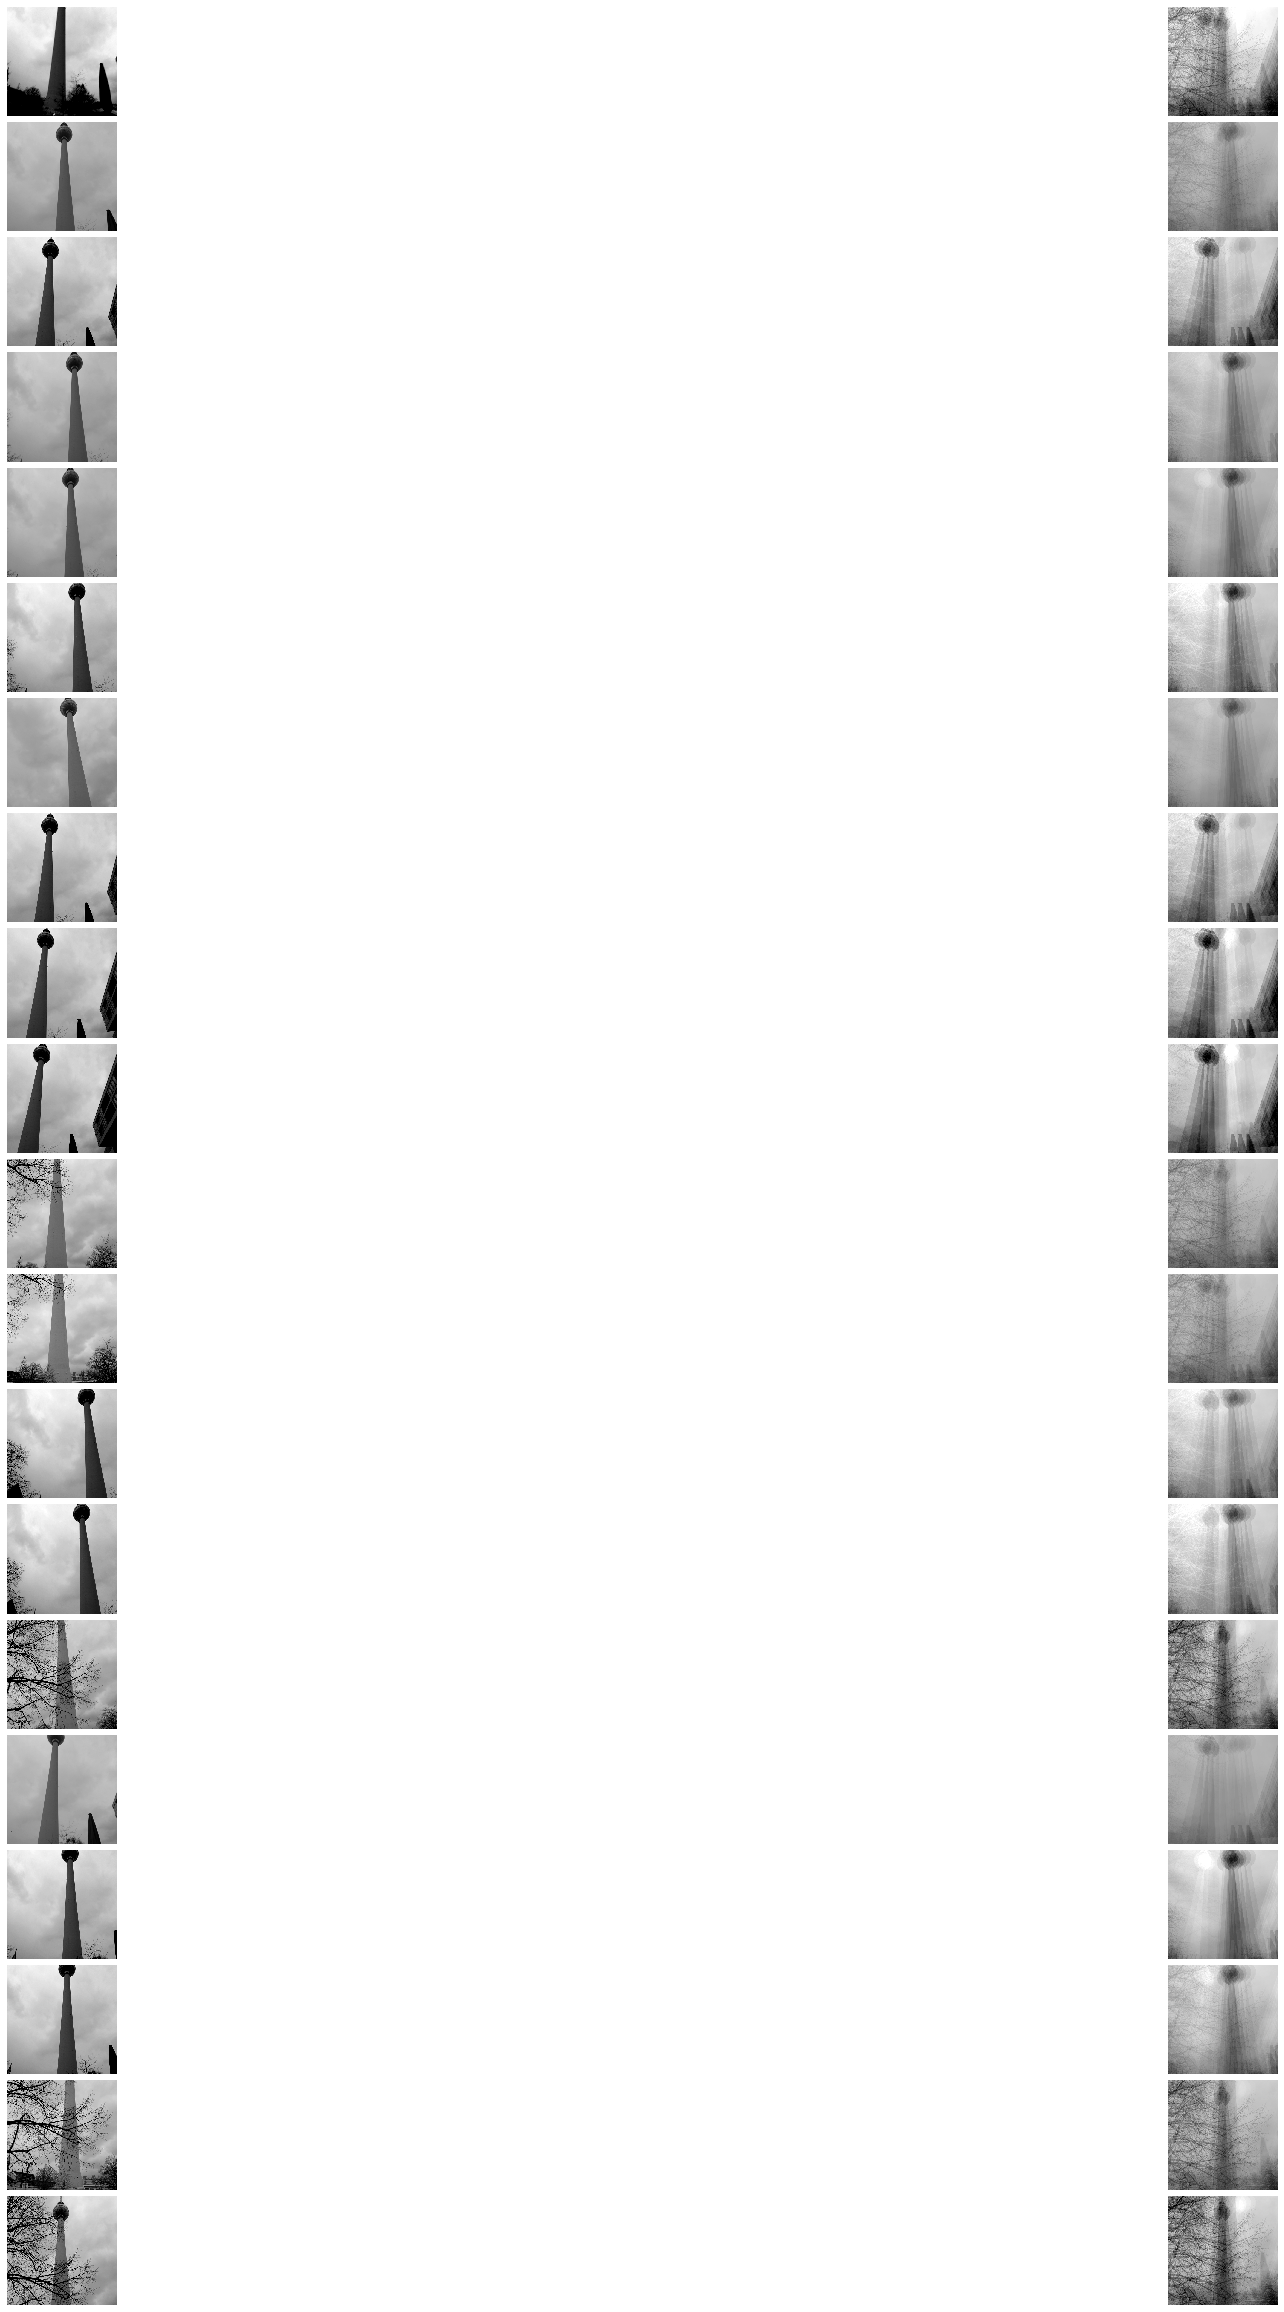

In [13]:
def plot_gallery(images, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(32,32), constrained_layout = True)
        
    # Plot it based on the eigentransformation
    for i, comp in enumerate(images[0]):
        vmax = max(comp.max(), -comp.min())
        # Show images
        fig.add_subplot(20, 2, 2*i+1)
        plt.imshow(
            comp.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.axis('off')
        
        # Reconstruct it
        fig.add_subplot(20, 2, 2*i+2)
        plt.imshow(
            images[1][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
        plt.axis('off')
    
    plt.show()

# Show images and their reconstruction
images_with_eigen = (X[:len(X)], PCA2D.inverse_transform(X_2D)[:len(X)])
plot_gallery(images_with_eigen)

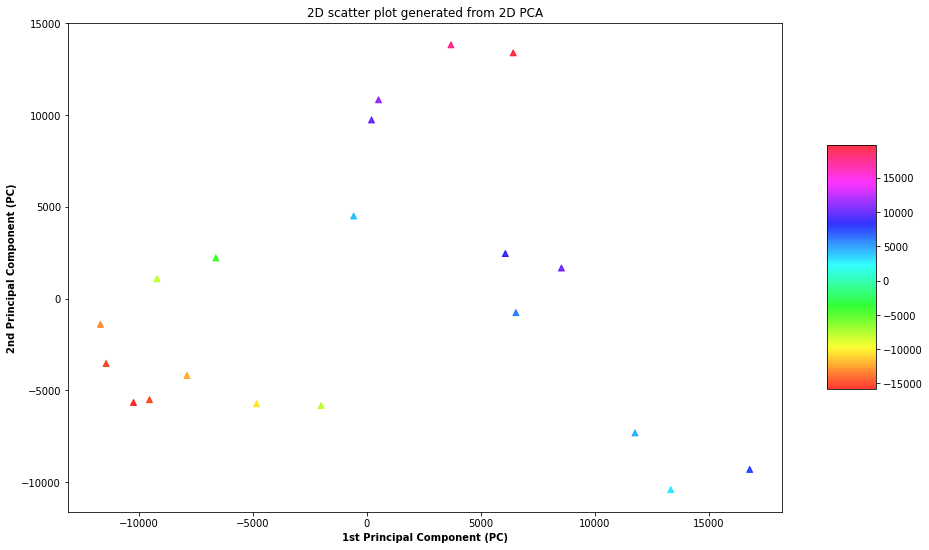

In [15]:
# Transpose PCA and put them into array
TwoD_ARR = X_2D.T

fig = plt.figure(figsize = (16, 9))
ax_2d = plt.axes()

my_cmap = plt.get_cmap('hsv')

# 2D Plot
plot_2d = ax_2d.scatter(TwoD_ARR[0], TwoD_ARR[1], 
            c=(TwoD_ARR[0] + TwoD_ARR[1]), 
            alpha=0.8, 
            cmap = my_cmap, 
            marker ='^')


plt.title("2D scatter plot generated from 2D PCA")
ax_2d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_2d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_2d, ax = ax_2d, shrink = 0.5, aspect = 5)
plt.show()

In [16]:
# PCA but 3D
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

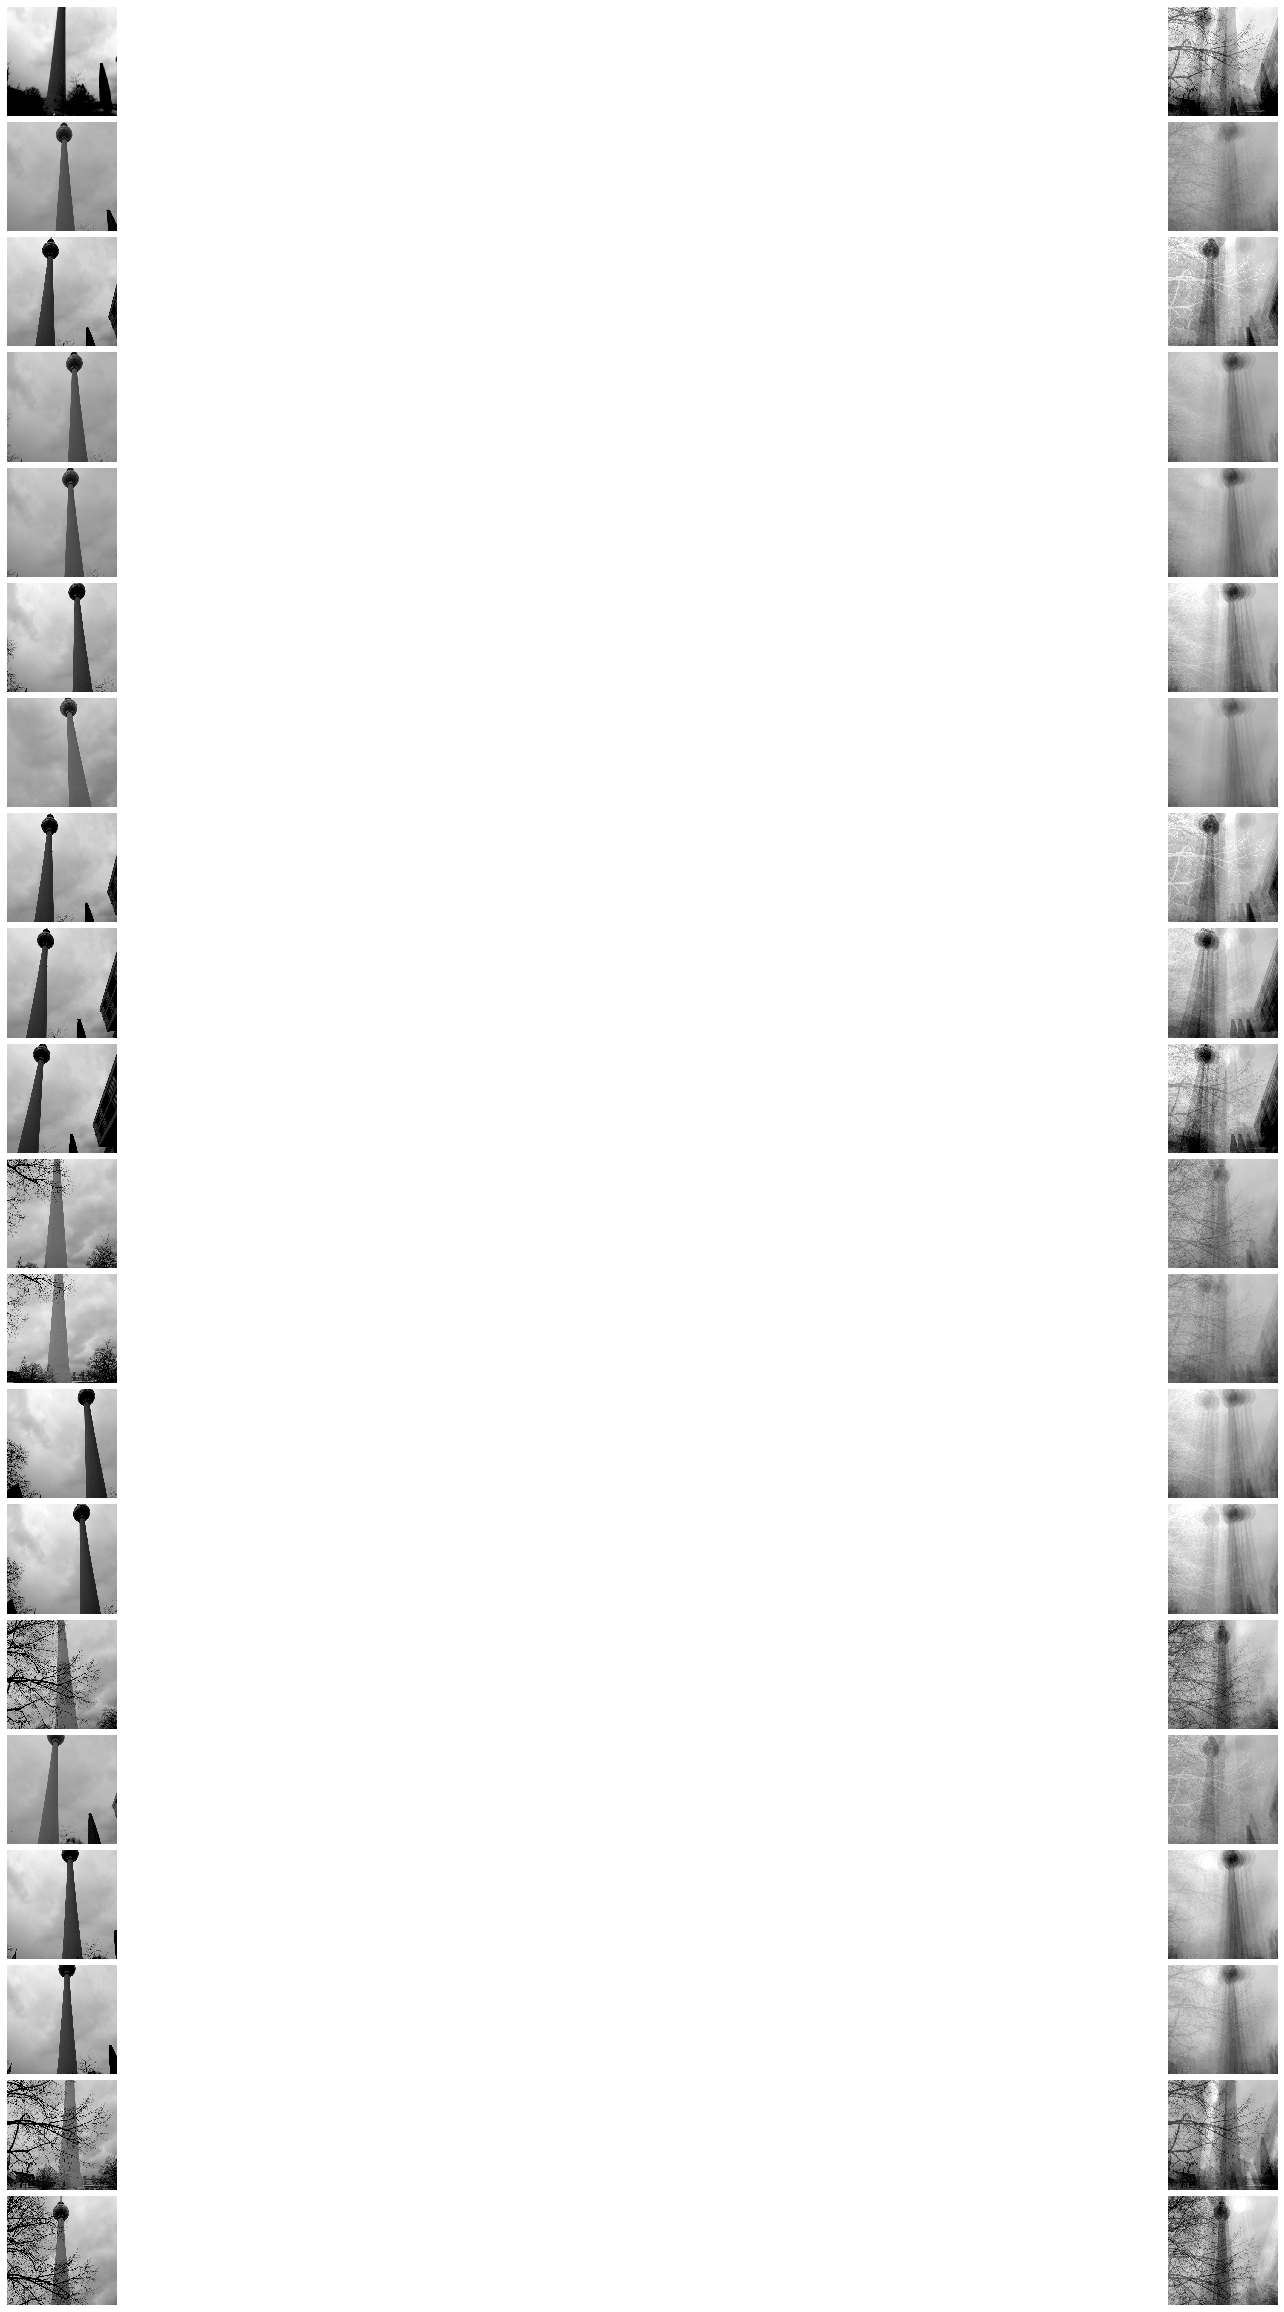

In [17]:
# Eigentransformations of images
images_with_eigen3d = (X[:len(X)], PCA3D.inverse_transform(X_3D)[:len(X)])
plot_gallery(images_with_eigen3d)

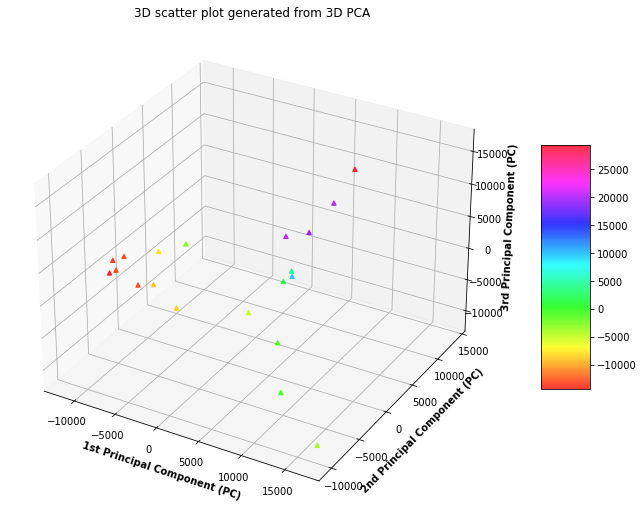

In [18]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

Picking my reference point to be the extrema of the scatter plot (15000, -10000) for both the first and second components, this yielded the image below:

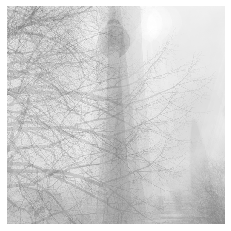

In [19]:
reference_point = [15000, -10000]
reference_inversed = PCA2D.inverse_transform(reference_point)
vmax = max(reference_inversed.max(), -reference_inversed.min())
cmap=plt.cm.gray
plt.imshow(
            reference_inversed.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
plt.axis('off')
plt.show()


### Alexanderplatz with iPhone 12 Pro Max

In [20]:
# Import all necessary moduels and libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
    
# Set a path for images
iPhoneAimage = glob('iPhoneA/*')

iPhoneAFlattened = []

for path in iPhoneAimage:
    # open files
    with open(path, 'r+b') as f:
        # open image
        with Image.open(f) as image:
            # Set it grayscale to make the ML simpler
            # and also to avoid any conflicts from color
            image = image.convert('L')
            # resize image to 512*512 pixels
            cover = resizeimage.resize_cover(image, [512, 512])
            # flatten the matrix
            iPhoneAFlattened.append(np.array(cover).flatten())
# set it as array   
iPhoneAFlattened = np.asarray(iPhoneAFlattened)


# set X value
X = iPhoneAFlattened

# stack the data into right dimension.
X = np.stack(i for i in X)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [21]:
# Import PCA
from sklearn.decomposition import PCA
# Import Matplolib
import matplotlib.pyplot as plt

# Perform 2-dimensional PCA
PCA2D = PCA(n_components=2)
PCA2D.fit(X)

# Transform it
X_2D = PCA2D.transform(X)

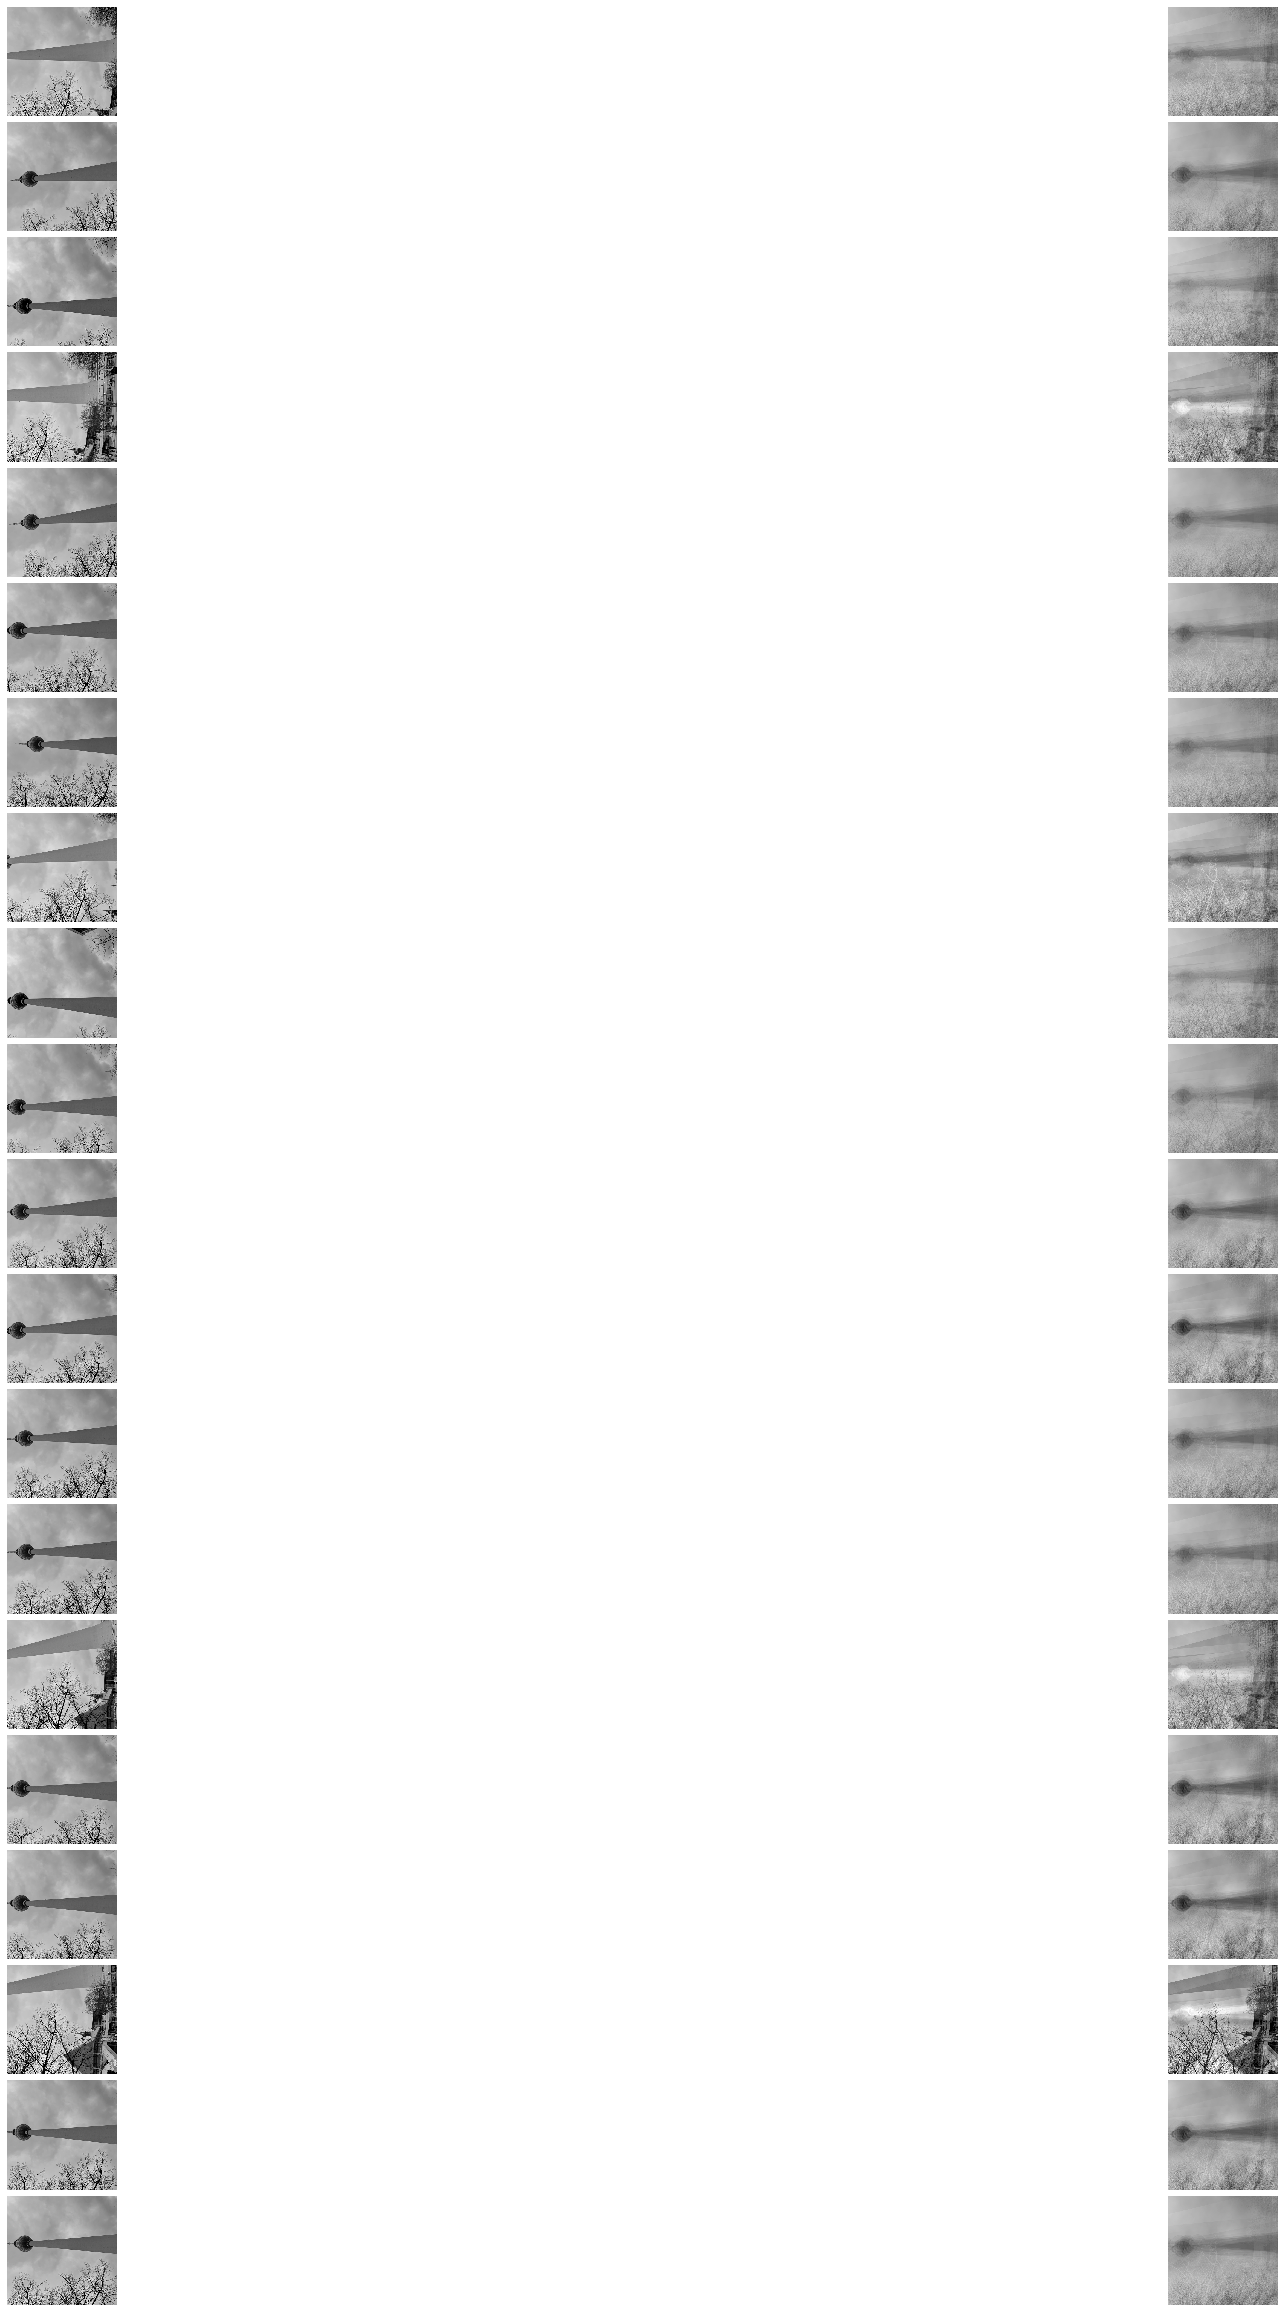

In [22]:
def plot_gallery(images, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(32,32), constrained_layout = True)
        
    # Plot it based on the eigentransformation
    for i, comp in enumerate(images[0]):
        vmax = max(comp.max(), -comp.min())
        # Show images
        fig.add_subplot(20, 2, 2*i+1)
        plt.imshow(
            comp.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.axis('off')
        
        # Reconstruct it
        fig.add_subplot(20, 2, 2*i+2)
        plt.imshow(
            images[1][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
        plt.axis('off')
    
    plt.show()

# Show images and their reconstruction
images_with_eigen = (X[:len(X)], PCA2D.inverse_transform(X_2D)[:len(X)])
plot_gallery(images_with_eigen)

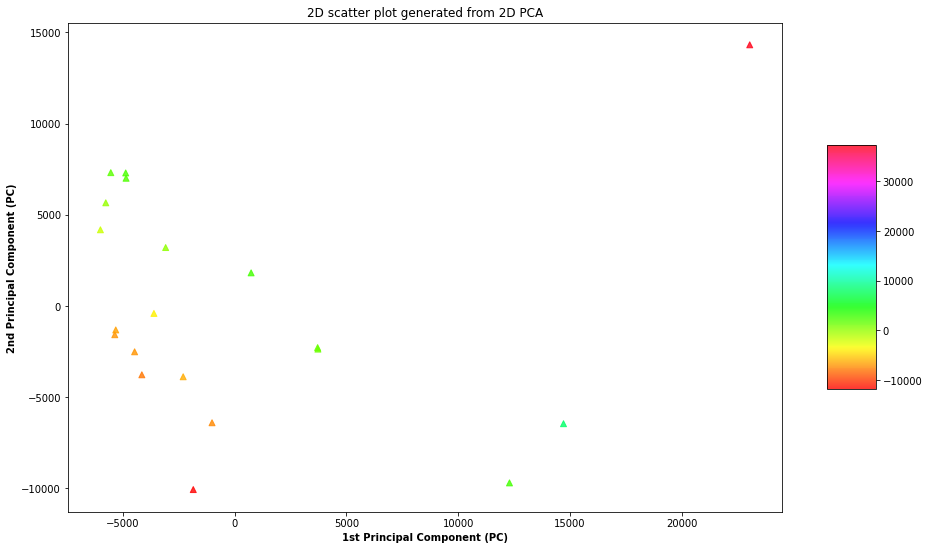

In [23]:
# Transpose PCA and put them into array
TwoD_ARR = X_2D.T

fig = plt.figure(figsize = (16, 9))
ax_2d = plt.axes()

my_cmap = plt.get_cmap('hsv')

# 2D Plot
plot_2d = ax_2d.scatter(TwoD_ARR[0], TwoD_ARR[1], 
            c=(TwoD_ARR[0] + TwoD_ARR[1]), 
            alpha=0.8, 
            cmap = my_cmap, 
            marker ='^')


plt.title("2D scatter plot generated from 2D PCA")
ax_2d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_2d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_2d, ax = ax_2d, shrink = 0.5, aspect = 5)
plt.show()

In [24]:
# PCA but 3D
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

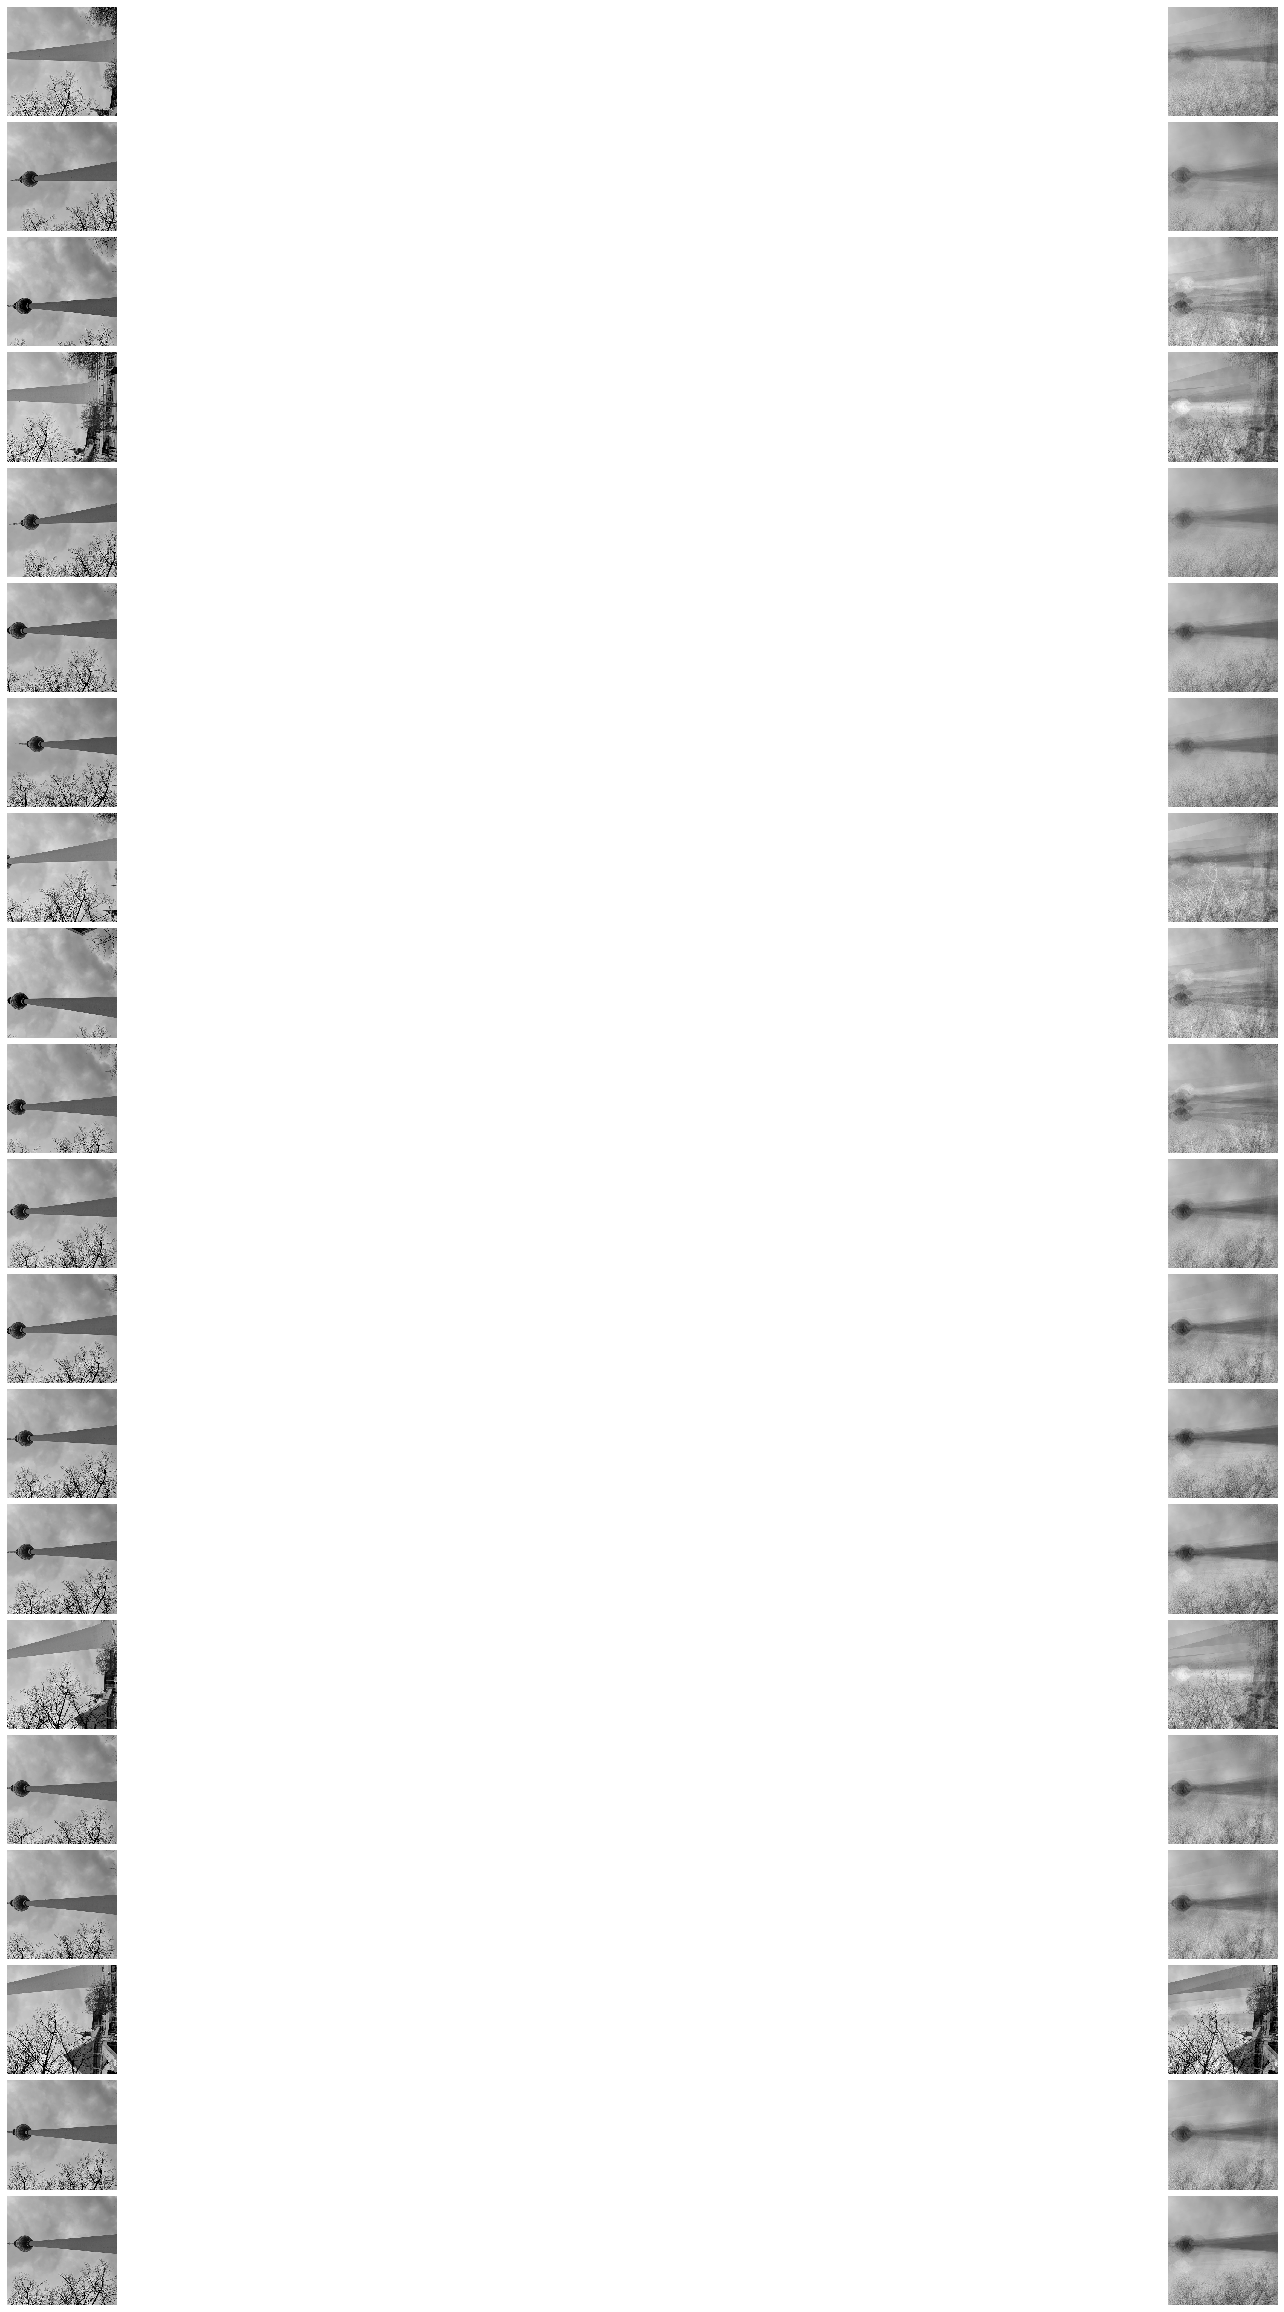

In [25]:
# Eigentransformations of images
images_with_eigen3d = (X[:len(X)], PCA3D.inverse_transform(X_3D)[:len(X)])
plot_gallery(images_with_eigen3d)

#### Comment here: I am not sure why images are rotated even they look fine on my screens before opening them?

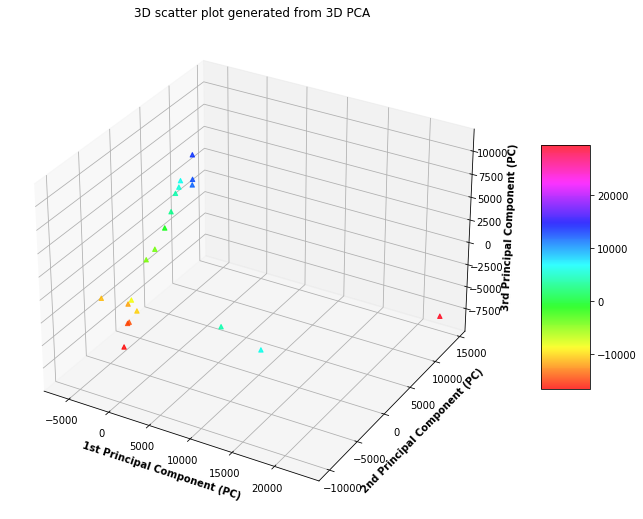

In [26]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

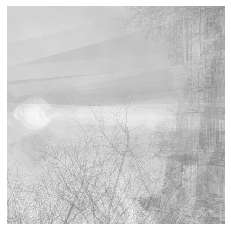

In [27]:
reference_point = [15000, -10000]
reference_inversed = PCA2D.inverse_transform(reference_point)
vmax = max(reference_inversed.max(), -reference_inversed.min())
cmap=plt.cm.gray
plt.imshow(
            reference_inversed.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
plt.axis('off')
plt.show()


### Analysis of Alexanderplatz between two devices:

For both 2D and 3D PCA analysis, iPhone shows more cluster than Coolpad. So this is a possible point that one can think of that having a higher image quality incrases the correlation as it has more detailed pixels within the same size of image. However, this might be one single case so if Berlin example shows the same result, one can say that having high quality images for training will increase the accuracy of the training.

### Berlin City Hall with Coolpad 3701A

In [28]:
# Import all necessary moduels and libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
    
# Set a path for images
CoolpadBimage = glob('CoolpadB/*')

CoolpadBFlattened = []

for path in CoolpadBimage:
    # open files
    with open(path, 'r+b') as f:
        # open image
        with Image.open(f) as image:
            # Set it grayscale to make the ML simpler
            # and also to avoid any conflicts from color
            image = image.convert('L')
            # resize image to 512*512 pixels
            cover = resizeimage.resize_cover(image, [512, 512])
            # flatten the matrix
            CoolpadBFlattened.append(np.array(cover).flatten())
# set it as array   
CoolpadBFlattened = np.asarray(CoolpadBFlattened)


# set X value
X = CoolpadBFlattened

# stack the data into right dimension.
X = np.stack(i for i in X)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [29]:
# Import PCA
from sklearn.decomposition import PCA
# Import Matplolib
import matplotlib.pyplot as plt

# Perform 2-dimensional PCA
PCA2D = PCA(n_components=2)
PCA2D.fit(X)

# Transform it
X_2D = PCA2D.transform(X)

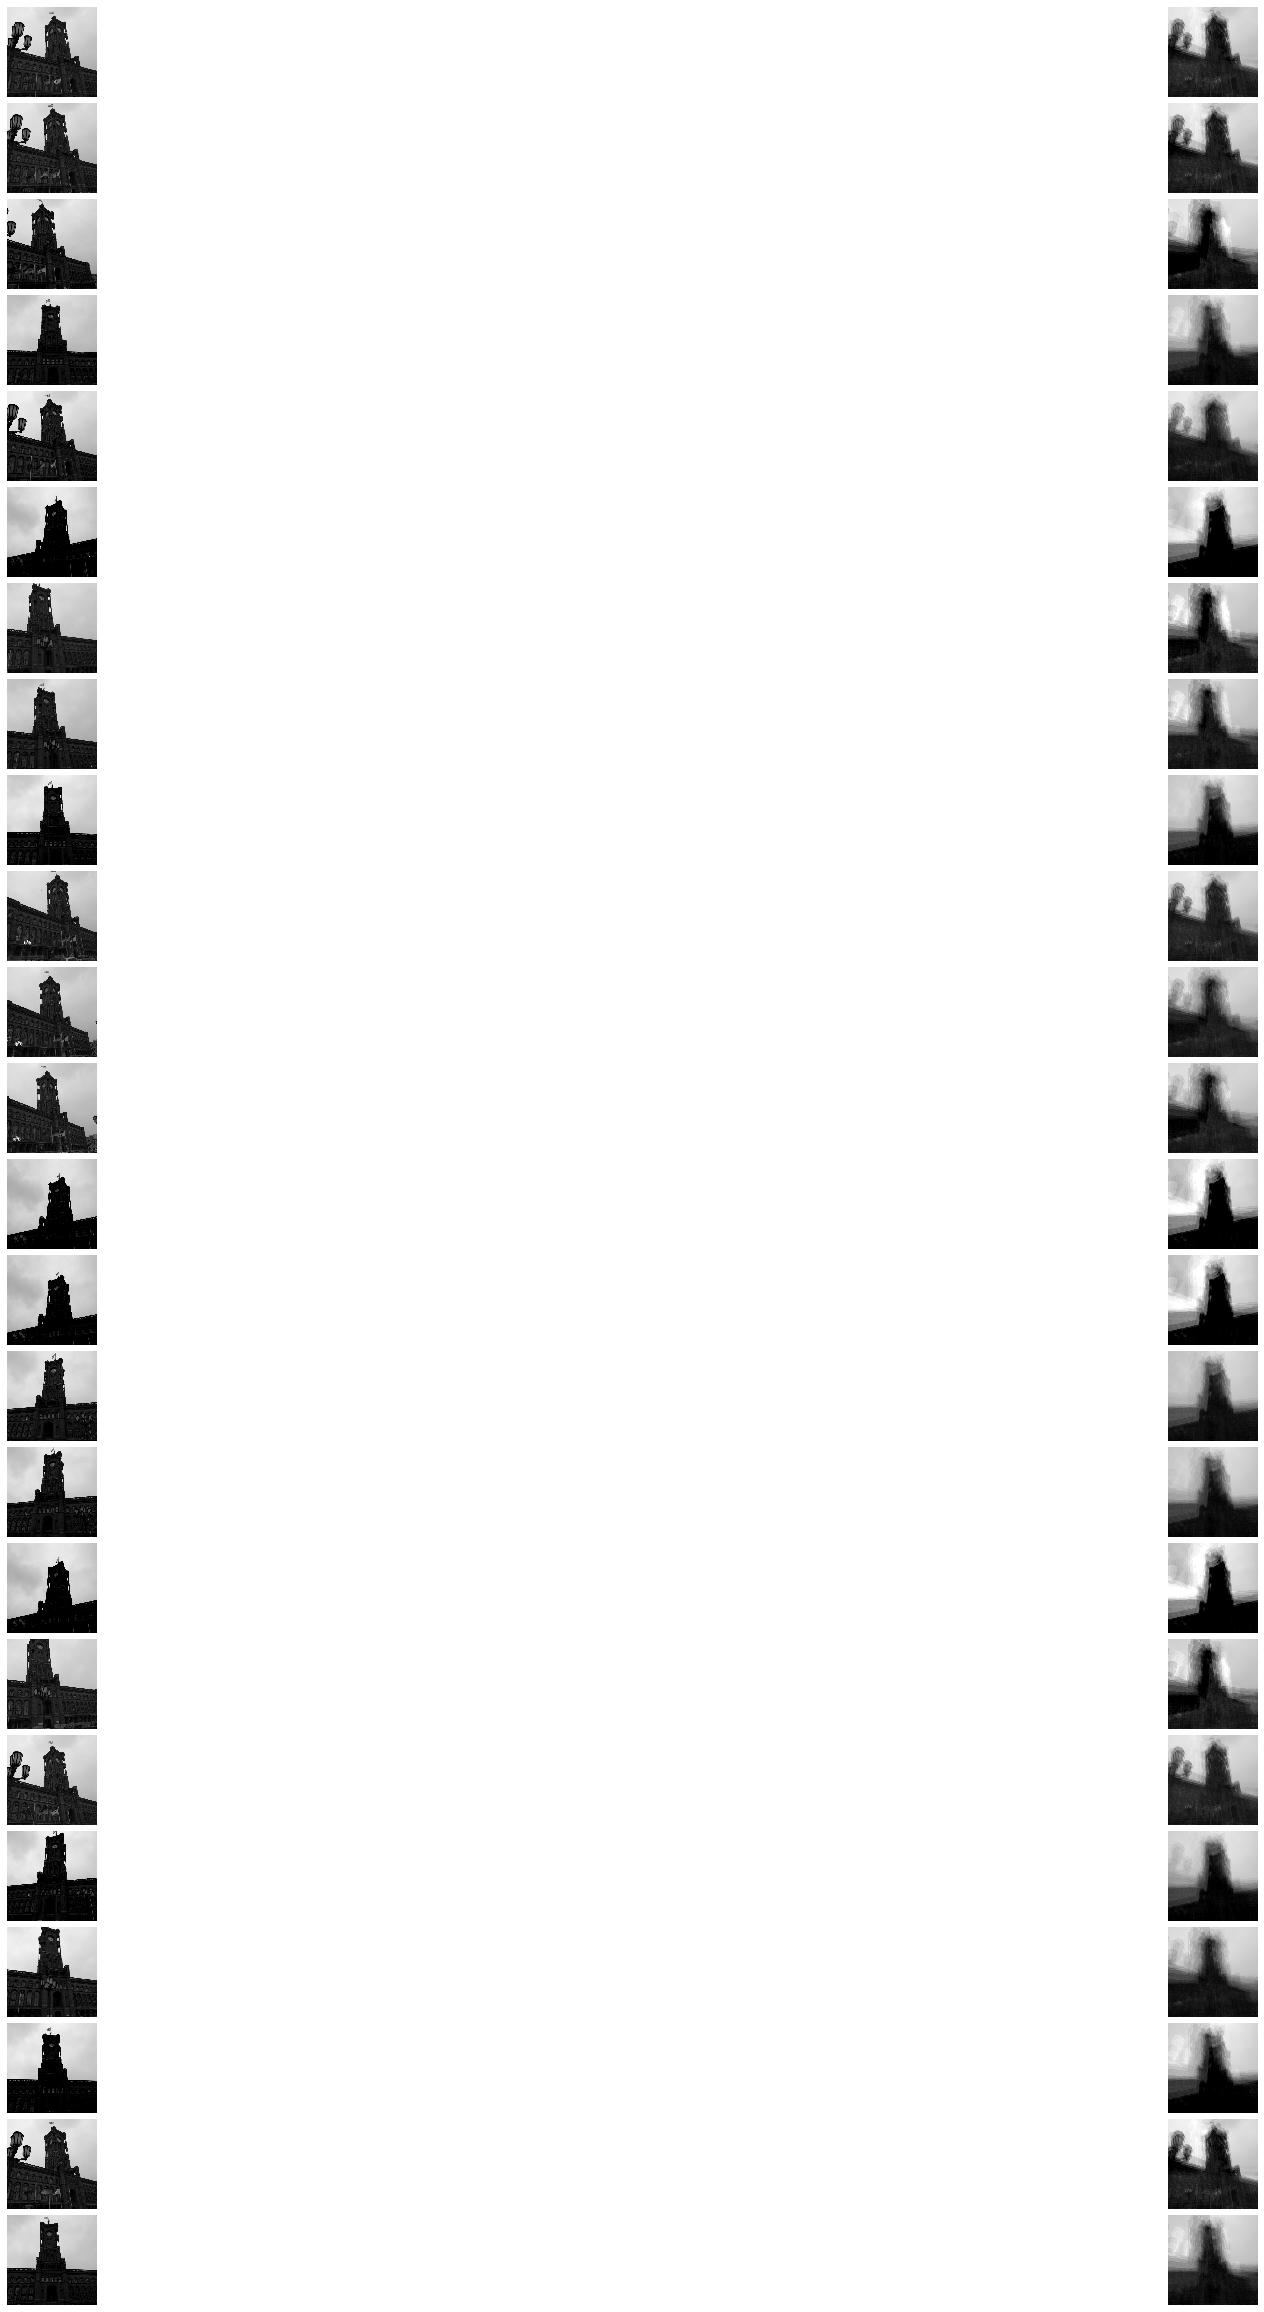

In [33]:
def plot_gallery(images, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(32,32), constrained_layout = True)
        
    # Plot it based on the eigentransformation
    for i, comp in enumerate(images[0]):
        vmax = max(comp.max(), -comp.min())
        # Show images
        fig.add_subplot(24, 2, 2*i+1)
        plt.imshow(
            comp.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.axis('off')
        
        # Reconstruct it
        fig.add_subplot(24, 2, 2*i+2)
        plt.imshow(
            images[1][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
        plt.axis('off')
    
    plt.show()

# Show images and their reconstruction
images_with_eigen = (X[:len(X)], PCA2D.inverse_transform(X_2D)[:len(X)])
plot_gallery(images_with_eigen)

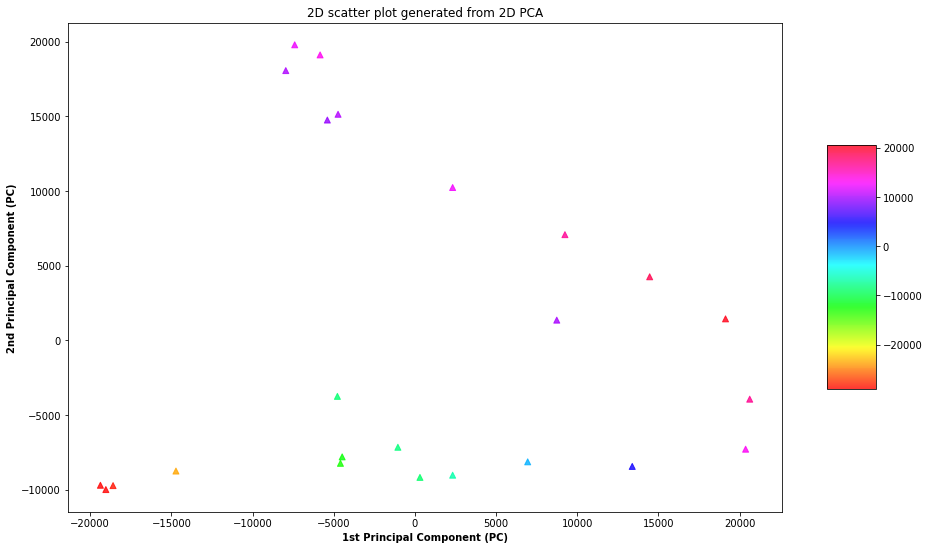

In [34]:
# Transpose PCA and put them into array
TwoD_ARR = X_2D.T

fig = plt.figure(figsize = (16, 9))
ax_2d = plt.axes()

my_cmap = plt.get_cmap('hsv')

# 2D Plot
plot_2d = ax_2d.scatter(TwoD_ARR[0], TwoD_ARR[1], 
            c=(TwoD_ARR[0] + TwoD_ARR[1]), 
            alpha=0.8, 
            cmap = my_cmap, 
            marker ='^')


plt.title("2D scatter plot generated from 2D PCA")
ax_2d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_2d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_2d, ax = ax_2d, shrink = 0.5, aspect = 5)
plt.show()

In [35]:
# PCA but 3D
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

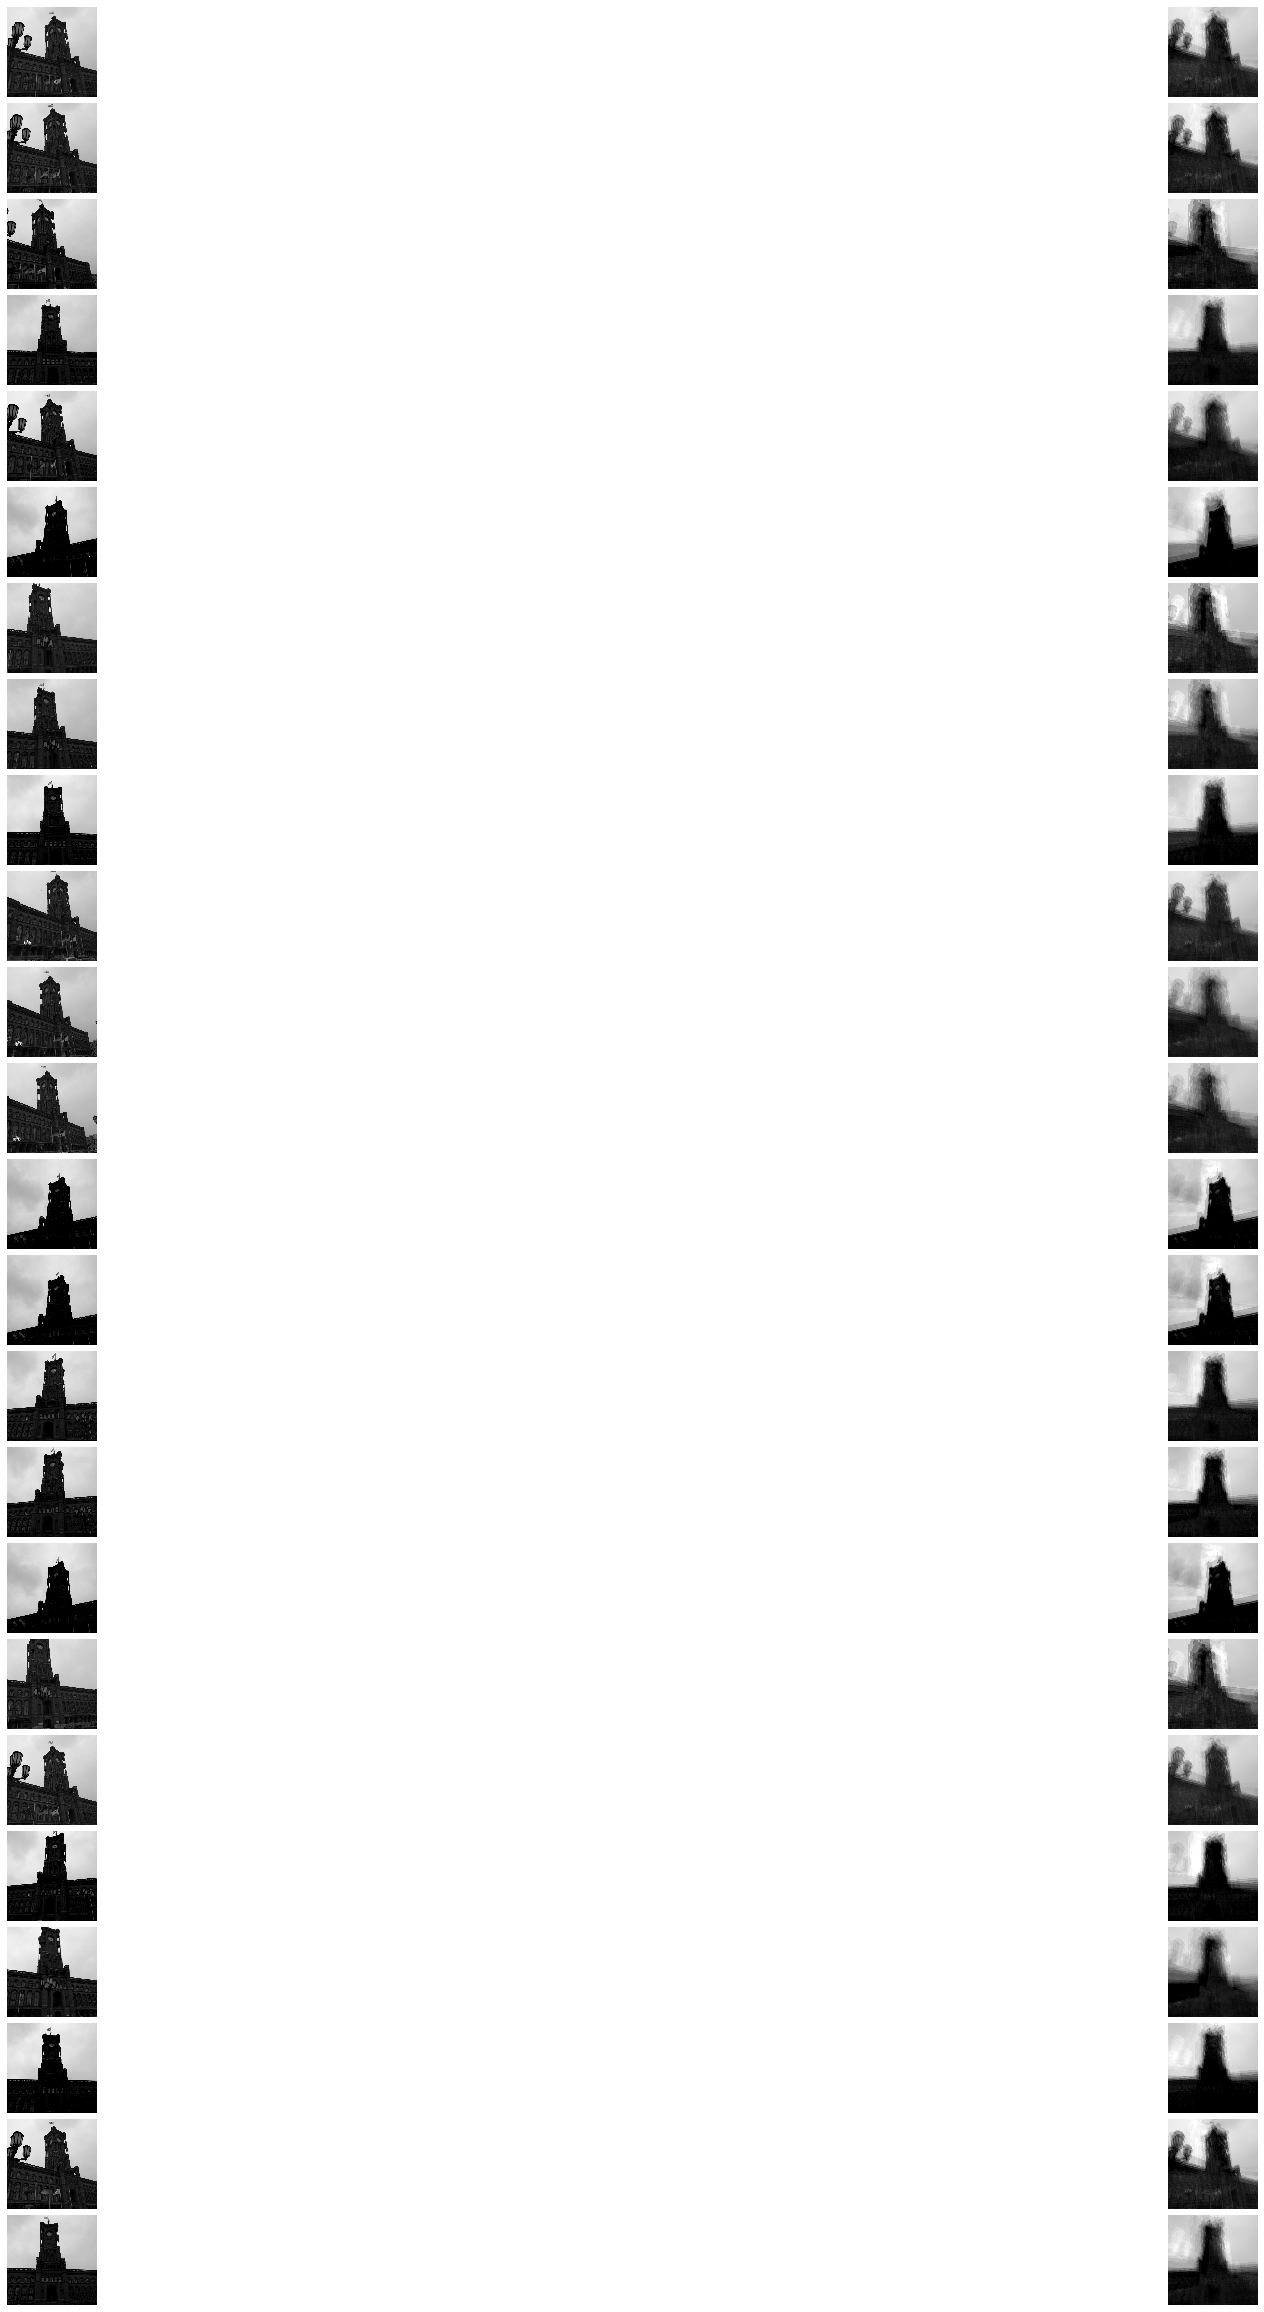

In [36]:
# Eigentransformations of images
images_with_eigen3d = (X[:len(X)], PCA3D.inverse_transform(X_3D)[:len(X)])
plot_gallery(images_with_eigen3d)

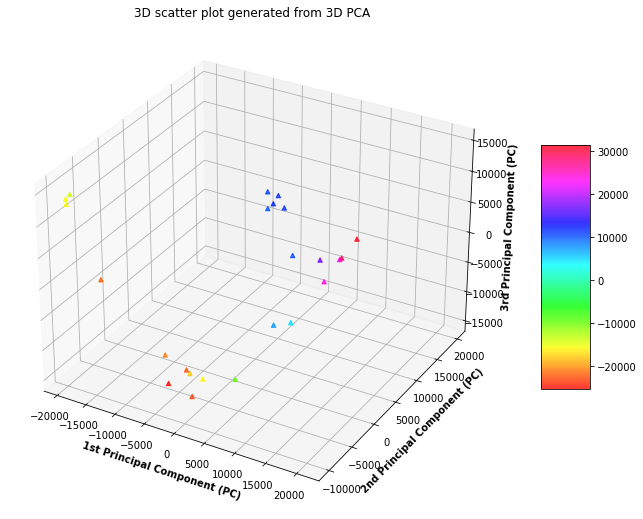

In [37]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

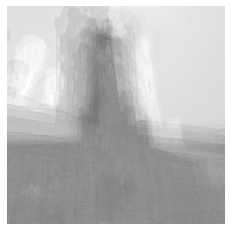

In [38]:
reference_point = [15000, -10000]
reference_inversed = PCA2D.inverse_transform(reference_point)
vmax = max(reference_inversed.max(), -reference_inversed.min())
cmap=plt.cm.gray
plt.imshow(
            reference_inversed.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
plt.axis('off')
plt.show()


### Berlin City Hall with iPhone 12 Pro Max

In [40]:
# Import all necessary moduels and libraries
from glob import glob
from PIL import Image
from resizeimage import resizeimage
import numpy as np
    
# Set a path for images
iPhoneBimage = glob('iPhoneB/*')

iPhoneBFlattened = []

for path in iPhoneBimage:
    # open files
    with open(path, 'r+b') as f:
        # open image
        with Image.open(f) as image:
            # Set it grayscale to make the ML simpler
            # and also to avoid any conflicts from color
            image = image.convert('L')
            # resize image to 512*512 pixels
            cover = resizeimage.resize_cover(image, [512, 512])
            # flatten the matrix
            iPhoneBFlattened.append(np.array(cover).flatten())
# set it as array   
iPhoneBFlattened = np.asarray(iPhoneBFlattened)


# set X value
X = iPhoneBFlattened

# stack the data into right dimension.
X = np.stack(i for i in X)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3364: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [41]:
# Import PCA
from sklearn.decomposition import PCA
# Import Matplolib
import matplotlib.pyplot as plt

# Perform 2-dimensional PCA
PCA2D = PCA(n_components=2)
PCA2D.fit(X)

# Transform it
X_2D = PCA2D.transform(X)

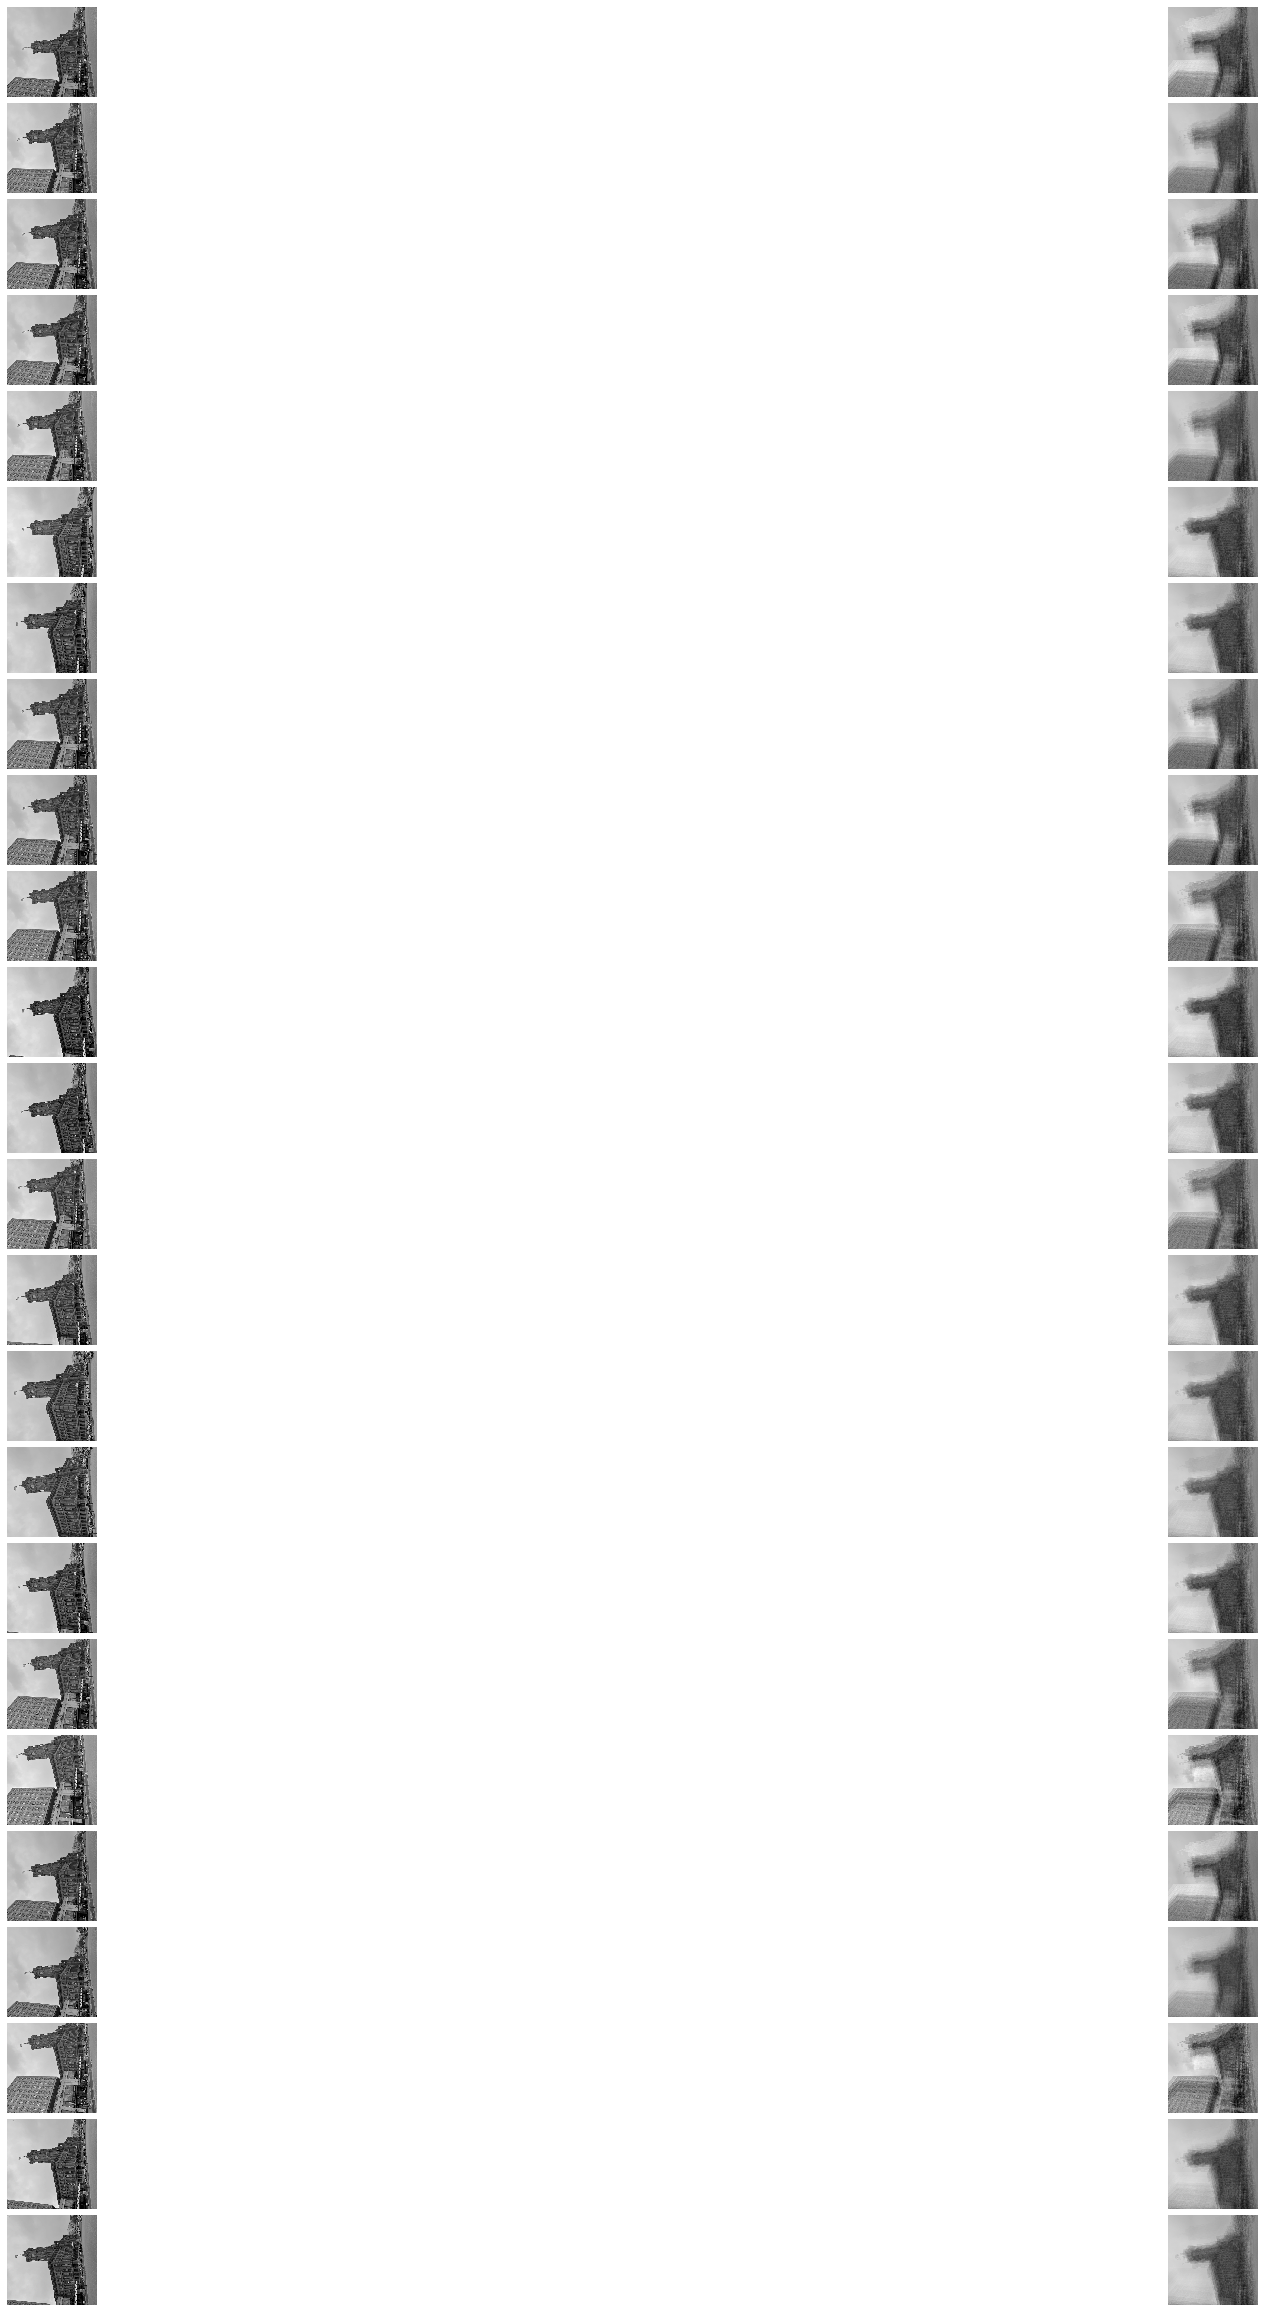

In [42]:
def plot_gallery(images, cmap=plt.cm.gray):
    fig = plt.figure(figsize=(32,32), constrained_layout = True)
        
    # Plot it based on the eigentransformation
    for i, comp in enumerate(images[0]):
        vmax = max(comp.max(), -comp.min())
        # Show images
        fig.add_subplot(24, 2, 2*i+1)
        plt.imshow(
            comp.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax=vmax,
        )
        plt.axis('off')
        
        # Reconstruct it
        fig.add_subplot(24, 2, 2*i+2)
        plt.imshow(
            images[1][i].reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
        plt.axis('off')
    
    plt.show()

# Show images and their reconstruction
images_with_eigen = (X[:len(X)], PCA2D.inverse_transform(X_2D)[:len(X)])
plot_gallery(images_with_eigen)

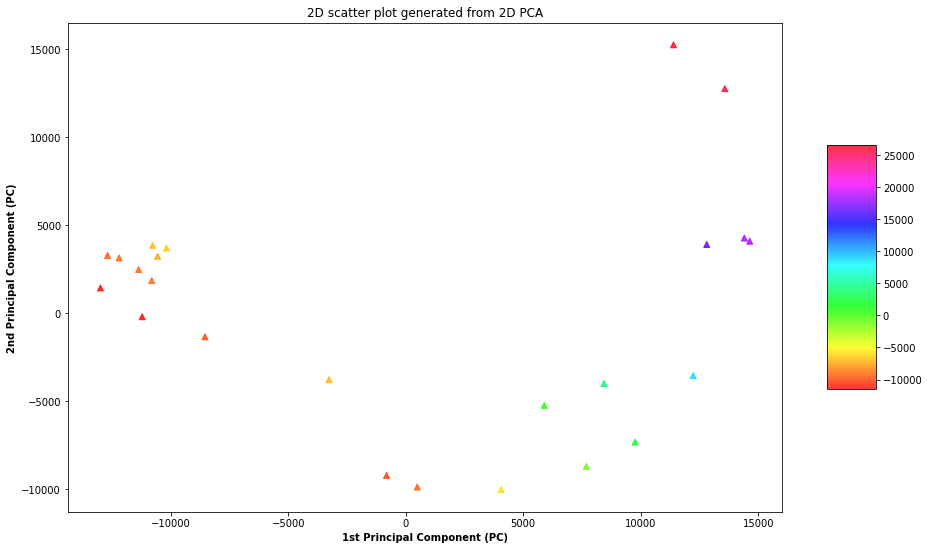

In [43]:
# Transpose PCA and put them into array
TwoD_ARR = X_2D.T

fig = plt.figure(figsize = (16, 9))
ax_2d = plt.axes()

my_cmap = plt.get_cmap('hsv')

# 2D Plot
plot_2d = ax_2d.scatter(TwoD_ARR[0], TwoD_ARR[1], 
            c=(TwoD_ARR[0] + TwoD_ARR[1]), 
            alpha=0.8, 
            cmap = my_cmap, 
            marker ='^')


plt.title("2D scatter plot generated from 2D PCA")
ax_2d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_2d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_2d, ax = ax_2d, shrink = 0.5, aspect = 5)
plt.show()

In [44]:
# PCA but 3D
PCA3D = PCA(n_components=3)
PCA3D.fit(X)

# Transfrom images to PCA
X_3D = PCA3D.transform(X)

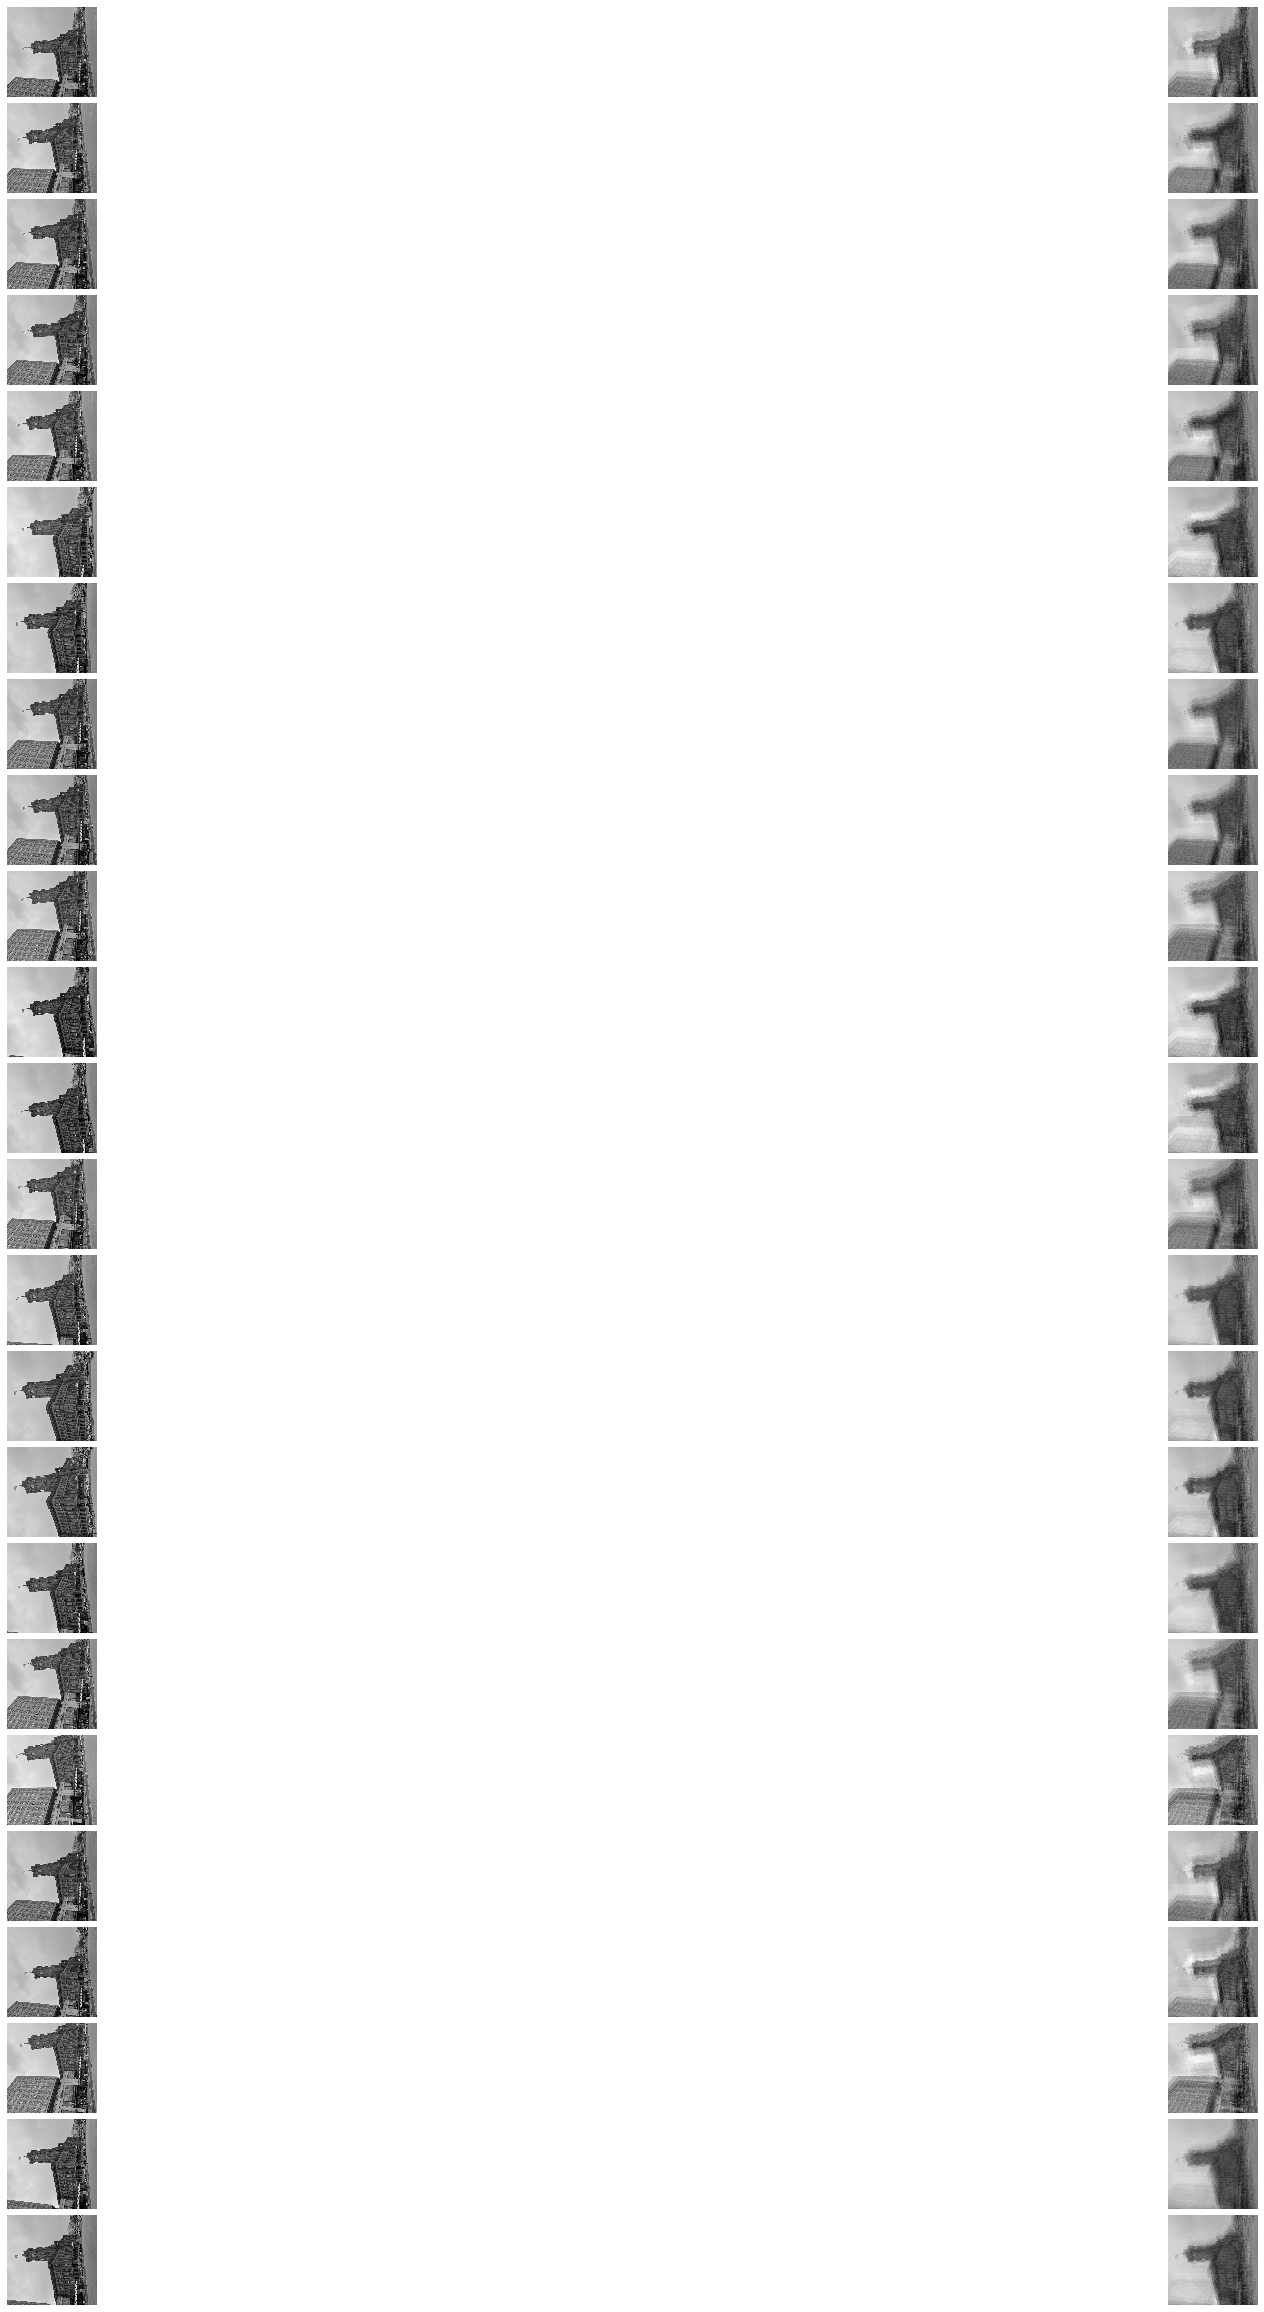

In [45]:
# Eigentransformations of images
images_with_eigen3d = (X[:len(X)], PCA3D.inverse_transform(X_3D)[:len(X)])
plot_gallery(images_with_eigen3d)

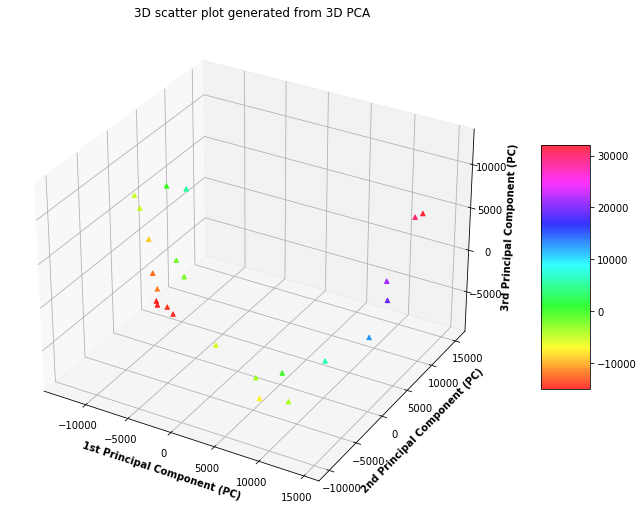

In [46]:
# Transpose PCA array
ThreeD_ARR = X_3D.T

fig = plt.figure(figsize = (16, 9))
ax_3d = plt.axes(projection = "3d")
ax_3d.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.3,
        alpha = 0.2)
 

plot_3d = ax_3d.scatter3D(ThreeD_ARR[0], ThreeD_ARR[1], ThreeD_ARR[2],
                    alpha = 0.8,
                    c = (ThreeD_ARR[0] + ThreeD_ARR[1] + ThreeD_ARR[2]),
                    cmap = my_cmap,
                    marker ='^')

plt.title("3D scatter plot generated from 3D PCA")
ax_3d.set_xlabel('1st Principal Component (PC)', fontweight ='bold')
ax_3d.set_ylabel('2nd Principal Component (PC)', fontweight ='bold')
ax_3d.set_zlabel('3rd Principal Component (PC)', fontweight ='bold')
fig.colorbar(plot_3d, ax = ax_3d, shrink = 0.5, aspect = 5)
plt.show()

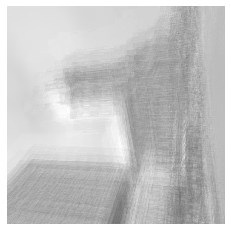

In [47]:
reference_point = [15000, -10000]
reference_inversed = PCA2D.inverse_transform(reference_point)
vmax = max(reference_inversed.max(), -reference_inversed.min())
cmap=plt.cm.gray
plt.imshow(
            reference_inversed.reshape((512, 512)),
            cmap=cmap,
            interpolation="nearest",
            vmin=-vmax,
            vmax= vmax,
        )
plt.axis('off')
plt.show()


### Analysis of Berlin City Hall between two devices:

For both 2D and 3D analysis, iPhone example and Berlin example don't really look scattered. However, there's still one interesting observation that iPhone example still shows the trend with a connected curved line while the Coolpad example don't really show it. I am not 100% sure but if one counts this connected behavior as "scattered," then it means that the higher image quality of training shows more insight and accuracy.

### General Analysis

In this report, I showed how the trainings can vary based on qualitiy of images. The higher quality of image tells brings more accuracy of the trained result and this leaves us a room of investigation and experiment in the future: with the perfect settings, one may can observe the development of machine learning over the time with the same algorithm.

If this experiment is conducted in the future, I expect a high correlation between image quality and their accuracy in training.

### `References`
1. [Sketchfab. (2021, May 21).](https://sketchfab.com/3d-models/victory-column-516e2c582864410b9f7862614ef339e1)